### Firstly using VGG with weights and model json

Saving VGG Model to Json

In [27]:
import keras
import numpy as np
import keras.utils as utils
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.datasets import cifar10
from keras.models import model_from_json
from keras.models import Model

In [21]:
classes=1000
def VGG16selfmade(input_shape):
    img_input = Input(shape=input_shape,name='input_7')
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=x, name='vgg16')
    return model

In [22]:
VGGmodelselfmade=VGG16selfmade((224,224,3))

In [23]:
Model.summary(VGGmodelselfmade)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Saving model to json format

In [25]:
with open('model_architecture_vgg_self_made.json', 'w') as f:
    f.write(VGGmodelselfmade.to_json())

Loading model from Json and weigths

In [29]:
def getmodel(weightspath,modelpath):
    with open(modelpath, 'r') as f:
        model = model_from_json(f.read())

    # Load weights into the new model
    model.load_weights(weightspath)
    return model
    

In [30]:
ModelLoadedFromWeights=getmodel('/home/shivam/Downloads/vgg16_weights_tf_dim_ordering_tf_kernels.h5','/home/shivam/Cifar analysis using Keras Tensorflow/Transfer learning using Keras/model_architecture_vgg_self_made.json')

In [31]:
ModelLoadedFromWeights.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Loading image and preprocessing it for testing

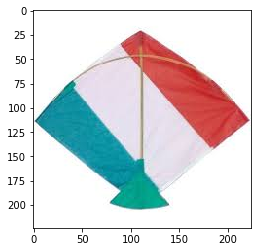

In [32]:
from keras.preprocessing.image import load_img
%matplotlib inline
import matplotlib.pyplot as plt
# load an image from file
image = load_img('kite.jpeg', target_size=(224, 224))
plt.imshow(image)

In [33]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [35]:
#reshaping image 
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
print image.shape

(1, 224, 224, 3)


In [36]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

#### Prediction

In [37]:
yhat = ModelLoadedFromWeights.predict(image)

#### Decoding predictions

In [44]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

umbrella (82.37%)
